# Linear regression

## Prerequisites

- Basic Python
- Linear algebra

## Learning objectives

- Know the difference between monovariate and multivariate regressions
- Implement your first machine learning algorithm from scratch, in Python
- Use analytical solution to solve for it
- See how to optimize linear regression using analytical solution

## Loading dataset

Once again we will use `Boston` dataset from `sklearn`, we saw it previously, easy stuff by now. Let's also split it into validation and test:

In [1]:
from sklearn import datasets, model_selection

# 15% for validation and test, 70% for train in total
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

print(X_train.shape, y_train.shape)

(354, 13) (354,)


## What is linear regression?

Classic starting point for machine learning adventures, something like `Hello World` but in ML world.

__Linear regression predicts continuous outputs__ - hence the regression part of the name.
Linear regression makes predictions that are simply a __`w`eighted__ combination (a linear combination) of the inputs (plus some offset called __`b`ias__). It is described by linear function:

$$
    y = wx + b
$$


![](images/linear_model.jpg)

In future we will experience much more complex, nonlinear relationships between features and labels that we wish to model. 

But __do not underestimate linear regression__ as it is often used in statistics and to explain a lot of phenomenas, at the end of the lesson we will see when it should be used in real world.

Functions that a model represent are often referred to as the **hypothesis**.

![](images/linear_model_example.jpg)

We will make our model able to make predictions for many examples at a time by expressing the hypothesis in vector form as shown below.

![](images/linear_model_vector.jpg)

Here's an example of what that computation might look like numerically.

![](images/linear_model_vector_example.jpg)


## Mathematical formula of model

Formula below presents linear regression for single example __but multiple features__:

$$
\begin{equation}
    y = w_1x_1 + w_2x_2 + ... + w_Nx_N + b = \sum_{i=1}^{N} w_ix_i + b
\end{equation}
$$

Essentially:
- each feature in our sample is multiplied by bias
Now let's implement our first machine learning model in code!

## Multiple features

We will go for multiple features, so here is how our weights will look like:

![title](images/w_vector.jpg)

The weights variable (w) becomes a row vector so we need to transpose it when we multiply it by the X matrix (or take a `dot` product of `data` and `weights`).

![title](images/vector_linear_regression.jpg)

## Monovariate vs multivariate

A dychotomy you might sometimes come across:

> monovariate linear regression is linear regression done with __one or multiple features__ but __predicting single target__

And __multivariate__ (as you may of guessed) would be

> linear regression with __one or multiple variables (features)__ but __predicting multiple targets__ (which are correlated with each other)

In this notebook we will be doing __monovariate__ only, but we will get to __multivariate__ when we do multiclass classification.

## Exercise

`LinearRegression` implementation is our task!

- Create a class `LinearRegression` which takes a single `n_features` argument during initialization.
    - Create `W` and `b` variables inside initialization. One of shape `(n_features, 1)` and `bias` of shape `1` initialized with random normal distribution
- Create `__call__` function (what does it do, what is a functor?) which takes `X` (`np.array`). It should return predictions our linear regression should do (see formulas above in the picture, it's two operations only)
- Create `update_params` function which takes `W` and `b` and assigns them to appropriate variables in `self`.

In [2]:
import numpy as np

class LinearRegression:
    def __init__(self, n_features: int): # initalize parameters 
        self.W = np.random.randn(n_features, 1) ## randomly initialise weight
        self.b = np.random.randn(1) ## randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W ## set this instance's weights to the new weight value passed to the function
        self.b = b ## do the same for the bias

In [13]:
model = LinearRegression(n_features=13)  # instantiate our linear model
y_pred = model(X_train)  # make prediction on data
print("Predictions:\n", y_pred[:10]) # print first 10 predictions

Predictions:
 [[ 8.53231141e-03]
 [-5.35468431e+00]
 [ 5.95418505e+00]
 [ 3.35656766e+00]
 [ 4.51060464e+00]
 [-2.13382115e+00]
 [-1.02723330e+00]
 [-8.65783812e+00]
 [ 1.58804725e+00]
 [ 1.17156681e+00]]


In [4]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

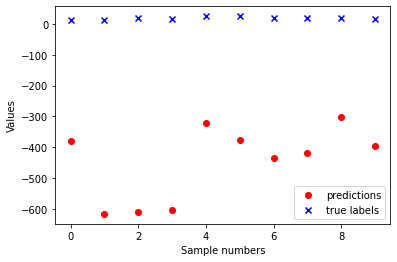

In [5]:
plot_predictions(y_pred[:10], y_train[:10])

## Analysis

As you can see predictions of our model are __way off__. This happens because we initialized our model with random weights and bias.

Now, we should learn how we can improve this model to learn from data:

## 3. Loss - how do we know how good our model is?

> Our **loss** should measure __how poor our model performs__. 

The larger the value, the worse so we will later try to __minimize it__ (bring as close to zero as possible). We will use it to give our model feedback about it's performance. 

> Loss values needs to return a **single number**, not a vector, not a matrix.

__NOTE:__ minimising the objective is equivalent to maximising the negative of it. 

Commonly, loss value is also called __cost function__ though it is not exact. Let's go over the difference now.

### Squared Error loss

> loss is a function which takes prediction and true label and returns __a positive scalar__

- The higher the loss value, the worse our model performs
- __Loss is defined on a single data point__

Squared error is one of the loss functions __used for regression tasks__ and is simply defined as:

$$
\begin{equation}
    (\hat{y} - y)^2
\end{equation}
$$

This does exactly what you think: it calculates the error (difference between our model's prediction $\hat{y}$ and the true value $y$):

$$
\begin{equation}
    \hat{y} - y
\end{equation}
$$

and then squares it to make the value positive. As long as the error is not zero it will increase the value of loss regardles of whether our prediction is below (negative error) or above (positive error) the value of the label.

### Mean Squared Error (MSE) cost function

> cost function is a generalization of loss functions for many data samples

So, __loss__ operates on single sample, while __cost__ operates on multiple of them.
In case of __Mean Squared Error__ we calculate squared error for each sample and take the mean of that value:

$$
\begin{equation}
    L_{mse} = \frac{1}{N}\sum_{i}^{N}(\hat{y_i} - y_i)^2
\end{equation}
$$

There are many other criterions that are useful for different tasks (e.g. the binary cross entropy (BCE) loss for classification, which we will cover later).

Let's write a function to calculate the cost using the mean squared error loss function. It should take in an array of predictions for different example inputs as well as an array of corresponding example labels. It should return a single number (scalar) that represents the MSE loss. 

## Exercise

Implement `mean_squared_error` function taking `y_pred` and `y_true`. Every formula is above (focusing on the last one is enough ;) )

In [6]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors)

In [7]:
cost = mean_squared_error(y_pred, y_train)
print(cost)

202773.00625866305


## The analytical solution to minimising mean square error

Now that we have our __loss__ equation we can calculate it's derivative w.r.t. weights. When we set it to zero we can calculate __weights values (`W`)__ which minimize it.

![](images/analytical_linear_reg.jpg)

Now let's implement this analytical solution for least squares regression in code:

## Exercise

Now that we have mathematical formula we can jump in straight to the implementation.

- For matrix inverse, you can use [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function
- Remember to return `weights` part of `matrix` first and `bias` after that (`bias` is the `0` element of the result)

In [8]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

[-1.22314495e-01  4.63139012e-02  2.94029510e-02  2.13765293e+00
 -1.59495784e+01  4.28401974e+00 -1.21465182e-02 -1.41230082e+00
  2.75826409e-01 -1.28000582e-02 -9.77786824e-01  9.85027744e-03
 -4.05834430e-01] 32.264564811607215


In case you didn't notice, this analytical solution has no mention of the model bias. 
In fact, we incorporate the model bias into our features matrix by adding an extra column filled with `1`.

![](images/bias_in_weight_matrix.jpg)

Doing this makes the analytical solution much clearer and means we have to solve it only for one value $W$, rather than also for $b$.

In practice (iterative optimization), we treat them as separate variables (we will later see more about that).

## Update parameters

Now that we have found `optimal_w` we should update our model and see how it performs:

In [9]:
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

20.912899991972914


## Drawbacks of computing the analytical solution

This solution involves inverting a matrix of size $R^{n \times n}$. 
Here $n$ is the number of features that each example has. 

With `560` features it is becoming more difficult. Furthermore, here, we only have ~500 samples, while in real life we can have millions or more.

However, as we will see, most problems of practical interest contain examples with many more features. 

> For example, 1080p images have more than 1,000,000 features each. 

The time complexity of inverting a matrix of size $n \times n$ is around $O(n^3)$. 
This means that computing the analytical solution for these kinds of real world problems is often computationally expensive or even impossible.

Analytical solutions however, are not the only approach that we can take (and usually we __even cannot use them__ as the close form cannot be calculated).

We will see how to update parameters iteratively soon.

## Summary

- linear regression is "hello world" basic machine learning model
- linear regression updates it's weight vector and bias in order to improve on the task
- this update can be carried out via analytically calculated formula
- the MSE loss is appropriate for many regression problems and is the most common loss function for this task